# Tokyo Olympic 2021

### Table of Content

###### 1.Gender EDA
###### 2.Atheltes EDA
###### 3.Teams EDA
###### 4.Coaches EDA
###### 5.Medals EDA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
athletes=pd.read_excel("Athletes.xlsx")
coaches=pd.read_excel("Coaches.xlsx")
teams=pd.read_excel("Teams.xlsx")
Gender=pd.read_excel("EntriesGender.xlsx")
medal=pd.read_excel("Medals.xlsx")

# 1. Gender EDA

In [3]:
Gender.info()
Gender.isnull().sum()
Gender.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
Discipline    46 non-null object
Female        46 non-null int64
Male          46 non-null int64
Total         46 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


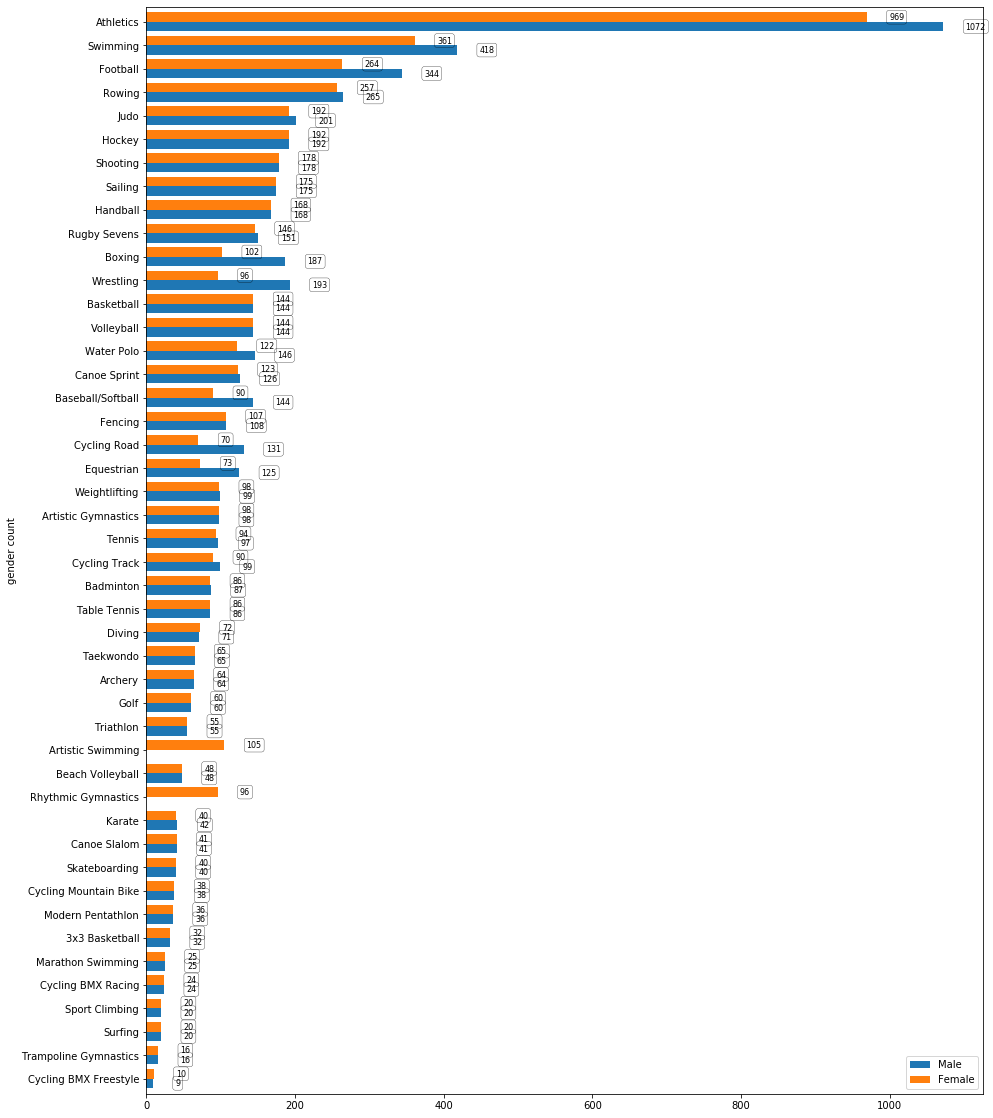

In [4]:
Gender.sort_values(by='Total',inplace=True)
sns=Gender.plot(x='Discipline',y=['Male','Female'],kind='barh',zorder=2,width=0.8,figsize=(15,20))
sns.set_ylabel("gender count")

for p in sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2 
                sns.text(x, y, value, ha='left', va='center', fontsize=8, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))



    Artistic Swimming and Rhythmic Gymnastics has no male Participants.
    Max number of participants is in the Athletics Discipline. Male: 1072 & Female: 969
    The least number of participants is in the Cycling BMX Freestyle Discipline. Male: 9 & Female: 10


# Athletes EDA

# Question 1: Which countries do most athletes come from?

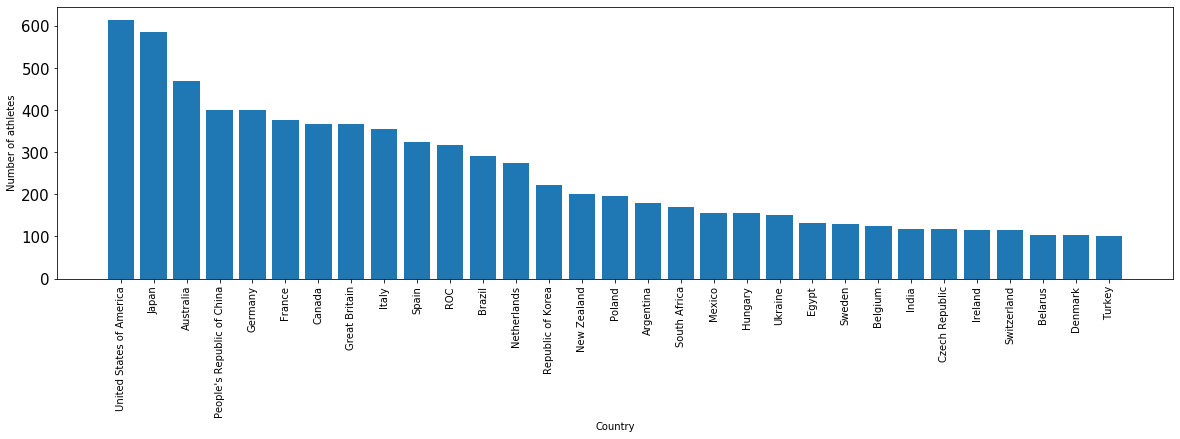

In [20]:
#We'll use value_counts to get a sorted order of values so we can use a fixed number of values to demonstrate which countries most players come from.
# Using all the countries would make the chart too clustered. 
y = athletes.NOC.value_counts().values[0:31]
x = athletes.NOC.value_counts().index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Number of athletes")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

Most athletes participating in the olympics usually reside from USA(600+), Japan, Australia, China and Germany and the least come from countries like Tanzania(Only 2), Sudan, etc.

# Question 2: Which discipline is most popular and which country has the highest participants in it?

Text(0, 0.5, 'Number of Athletes')

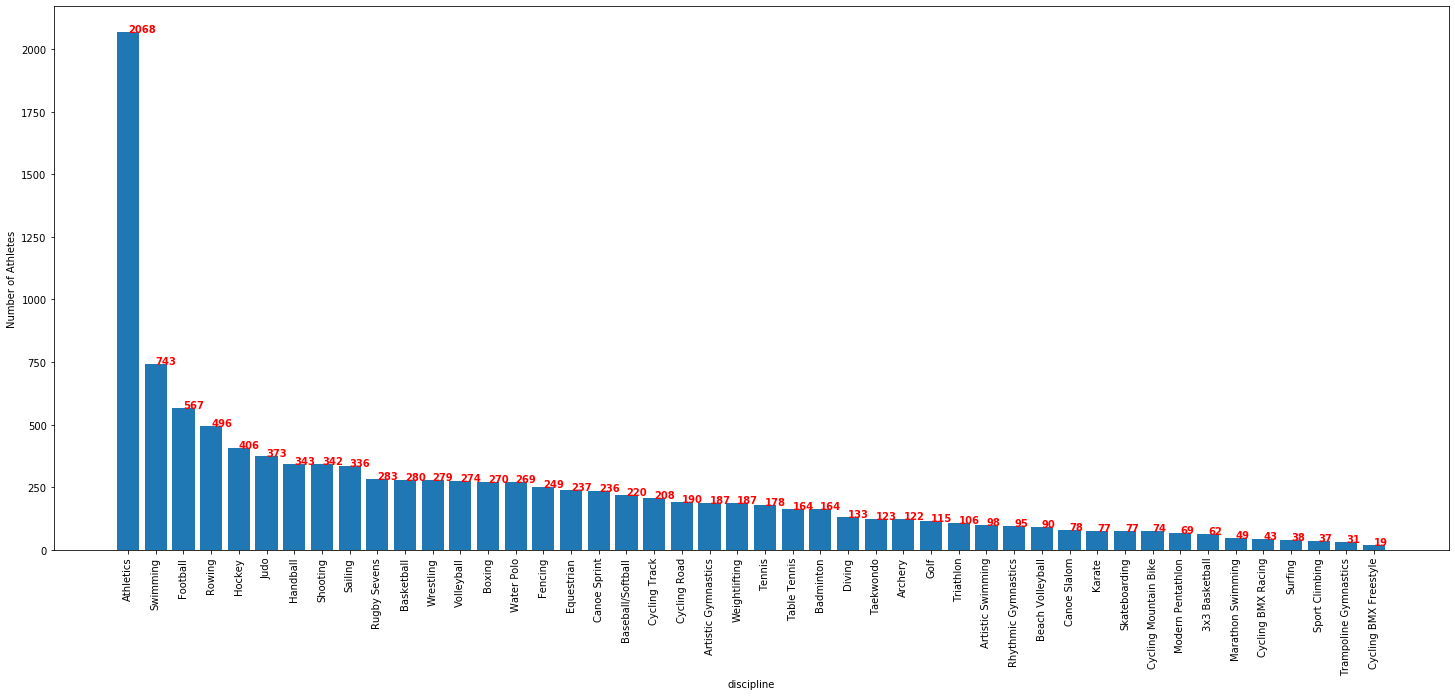

In [36]:
x=athletes.Discipline.value_counts().index
y=athletes.Discipline.value_counts().values
plt.figure(figsize=(25,10))
plt.bar(x,y,width=0.8)
for index,values in enumerate(y):
    plt.text(index,values,str(values),color='red',size=10,fontweight='bold')
plt.xlabel("discipline")
plt.xticks(rotation='vertical')
plt.ylabel("Number of Athletes")





###### Athletics is the most popular discipline in the olympics; it has most number of participants. Swimming and Football are the next most popular ones but Cycling BMX Freestyle is the least popular discipline with only 19 participants in it.

In [38]:
athletes=teams[(teams['Discipline']=="Athletics")]
athletes.NOC.value_counts()

Jamaica                       5
Italy                         5
Great Britain                 5
Germany                       5
Netherlands                   5
United States of America      5
France                        4
Poland                        4
Brazil                        3
Japan                         3
Belgium                       3
Trinidad and Tobago           3
People's Republic of China    2
Switzerland                   2
Canada                        2
South Africa                  2
Ukraine                       2
India                         2
Nigeria                       2
Denmark                       2
Turkey                        1
Bahamas                       1
Colombia                      1
Czech Republic                1
Botswana                      1
Ireland                       1
Ghana                         1
Australia                     1
Belarus                       1
Cuba                          1
Ecuador                       1
Dominica

#### Athletics, the most popular discipline, has most participants (5) from the United States, Netherlands, jamaica, Italy , Great Britain and Germany

# Coaches EDA

# Question 3: Which country produces highest number of coaches?

In [40]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [41]:
coaches.NOC.value_counts()

Japan                       35
United States of America    28
Spain                       28
Australia                   22
Canada                      16
                            ..
Bahrain                      1
Honduras                     1
Liechtenstein                1
Belarus                      1
Slovakia                     1
Name: NOC, Length: 61, dtype: int64

#### Japan produces the highest number of coaches and the US after them. Countries like Bahrain and Honduras have the least among others, only 1.

# Medals EDA

# Question 4: Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each?

In [43]:
medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


Text(0.5, 1.0, 'Gold Medals across Nations')

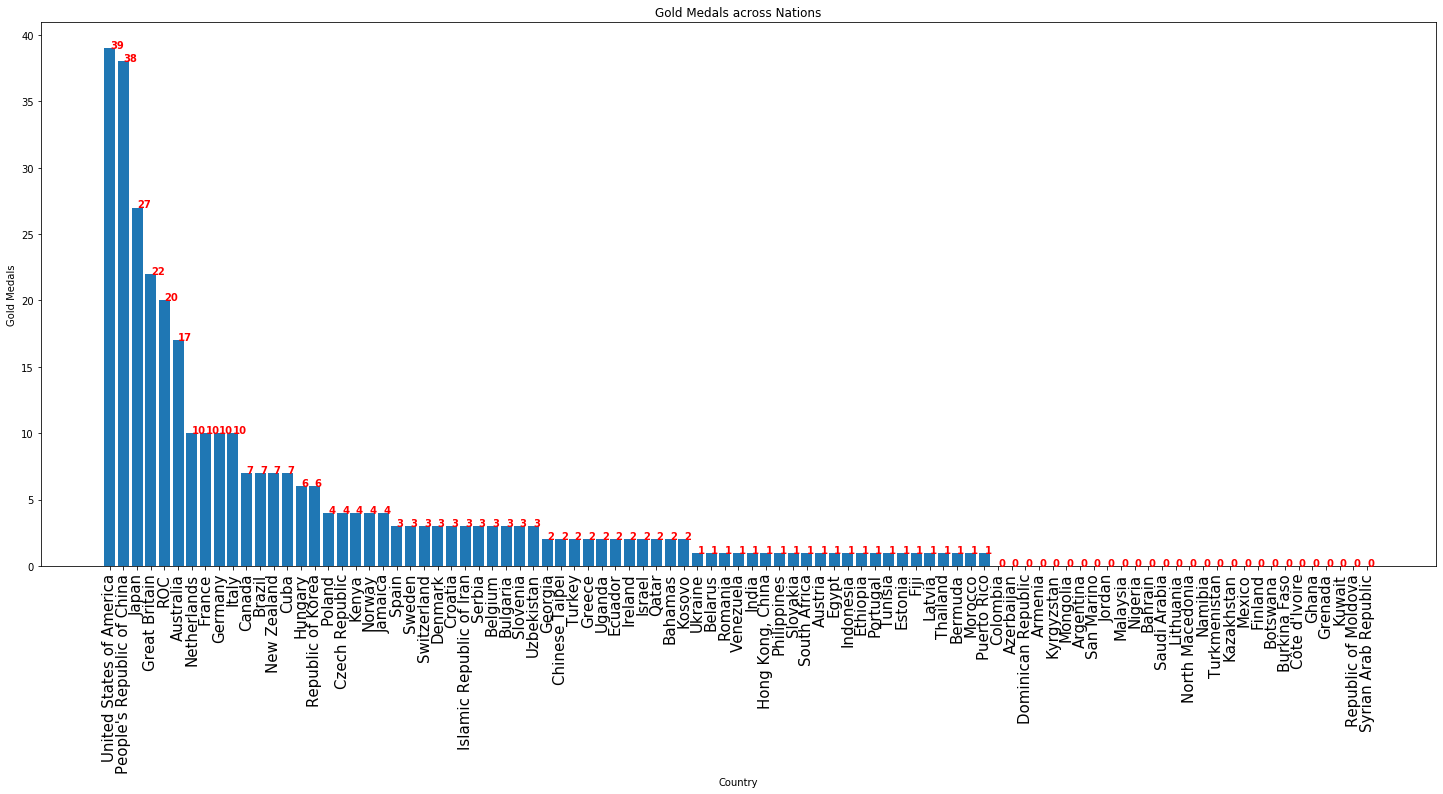

In [50]:
#Renamig the column Team/NOC to team
medal.rename(columns={'Team/NOC':'Team'},inplace=True)
x=[]
for team in medal.Team:
    x.append(team)
    
y=medal.Gold
plt.figure(figsize=(25,10))
plt.bar(x,y)
for index,values in enumerate(y):
    plt.text(index,values,str(values),color='red',fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Gold Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Gold Medals across Nations")

 #### USA has most gold medals among all countries (39), with China having one less (38) and Japan behind them (27).

Text(0.5, 1.0, 'Silver Medals across Nations')

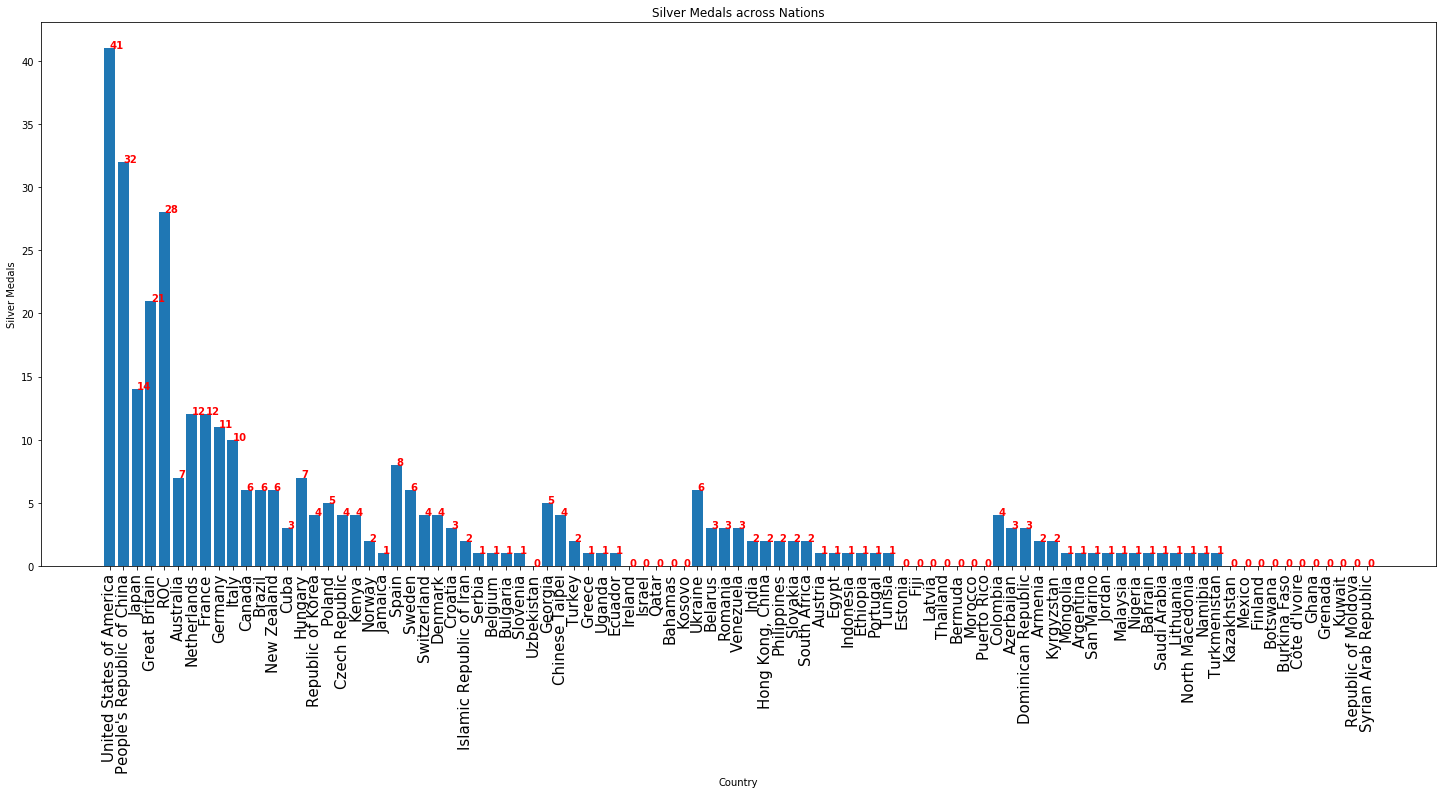

In [51]:
medal.rename(columns={'Team/NOC':'Team'},inplace=True)
x=[]
for team in medal.Team:
    x.append(team)
    
y=medal.Silver
plt.figure(figsize=(25,10))
plt.bar(x,y)
for index,values in enumerate(y):
    plt.text(index,values,str(values),color='red',fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Silver Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Silver Medals across Nations")

#### USA also has the most silver medals (41) and China second highest (32)

Text(0.5, 1.0, 'Bronze Medals across Nations')

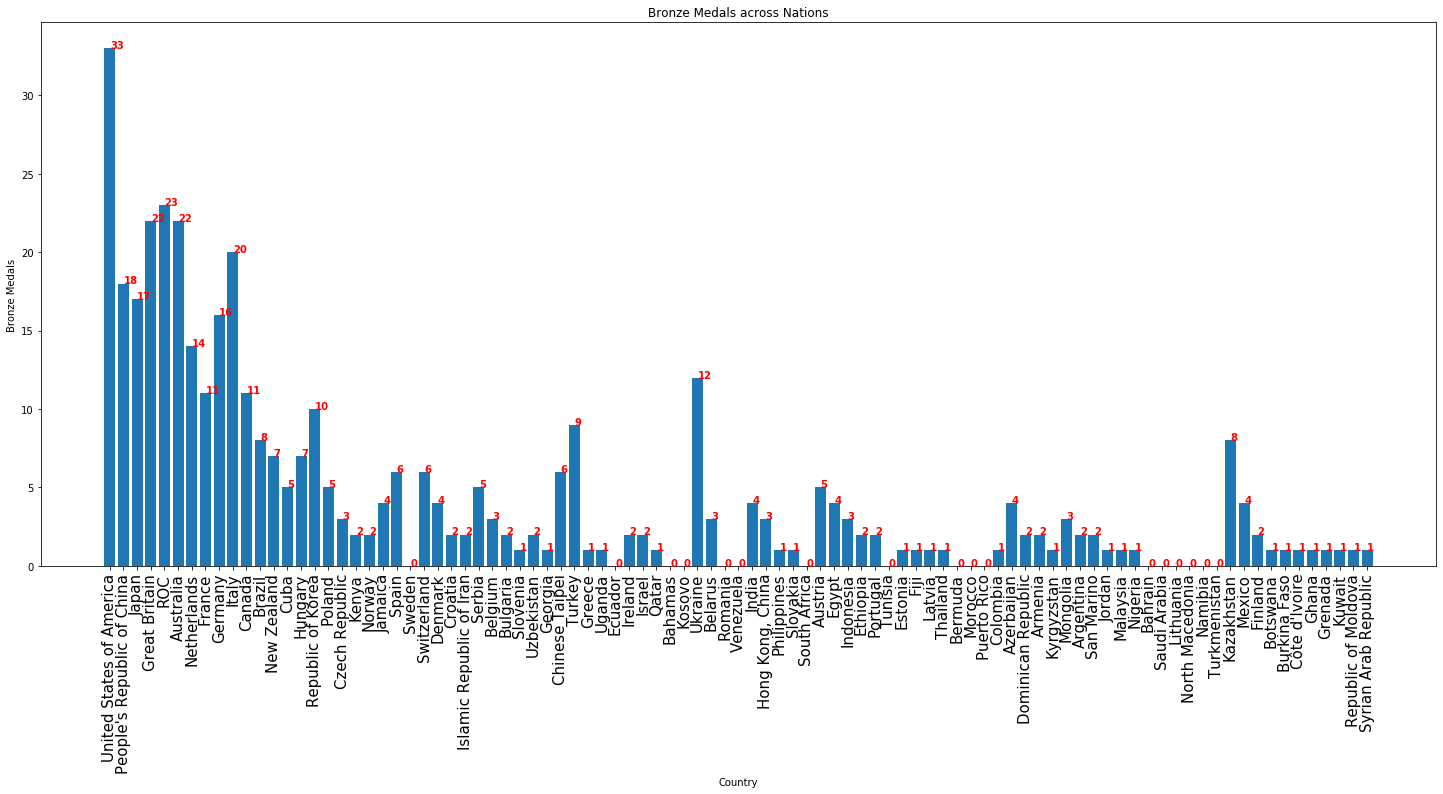

In [52]:
medal.rename(columns={'Team/NOC':'Team'},inplace=True)
x=[]
for team in medal.Team:
    x.append(team)
    
y=medal.Bronze
plt.figure(figsize=(25,10))
plt.bar(x,y)
for index,values in enumerate(y):
    plt.text(index,values,str(values),color='red',fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Bronze Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Bronze Medals across Nations")

### Again, USA with the most number of bronze medals with Russia the second highest (23).

# Final Analysis



    Most althletes in the olympics reside from countries like the United States of America, Japan and Australia. This could be because these countries promote sports and athletics from a younger age, hone the youth and prepare them to compete in such higher levels and invest more behind these. Unlike countries like Tanzania or Sudan, these countries probably have a better sports culture.
    Athletics is the most popular discipline in the Olympics. This could be because other sports like football/basketball get other stages for players to display their merits so probably this is why athetes performing in athletics try to display their abilities in this grand stage.
    Japan produces the most coaches and US after them. Again this could be because of the vast culture of sports in these nations and as athletes grow preparing from a much younger age, they gain a lot of experience, resultingly becoming coaches.
    Females participate in all the disciplines but comparatively less than men. This cannot be because of any kinds of discrimination, rather the lack of growth of mindsets in young women to become great athletes someday in comparison to men. But, surely this statistic has developed a lot in the past years and some day, women might dominate more in these stages too.
    USA has highest number of gold, silver and bronze medals and this shows how succesful the US is. The biggest reason could be wealth; more investment on athletes and their respective disciplines. Having better coaches and facilities does help create better and improved athletes so wealth could probably be why USA does so much better than other countries.

